In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from wand.image import Image
import matplotlib.image as mpimg
from GammaE import GammaNoise

In [4]:
def open_image(image_name, type_noise):
    img = mpimg.imread(image_name)
    plt.figure(figsize=(8, 6))  
    plt.imshow(img)              
    plt.axis('off')              
    plt.title(type_noise) 
    plt.show()

##### 1. Загрузите исходное изображение черепа человека scull.jpg. Сформируйте искаженные изображения черепа человека добавлением модельных аддитивных шумов следующего типа: гауссов шум, гамма шум и импульсный шум. Постройте гистограммы исходного изображения и сгенерированных искаженных изображений, сравните полученные гистограммы и сделайте выводы.Загрузите исходное изображение черепа человека scull.jpg. Сформируйте искаженные изображения черепа человека добавлением модельных аддитивных шумов следующего типа: гауссов шум, гамма шум и импульсный шум. Постройте гистограммы исходного изображения и сгенерированных искаженных изображений, сравните полученные гистограммы и сделайте выводы.

In [5]:
def additive_noise (type_noise, attenuate, image_name):
    with Image(filename ='scull.jpg') as img:
        img.noise(type_noise, attenuate = attenuate)
        img.save(filename = image_name)
    f = cv2.imread(image_name)
    cv2.imwrite(image_name, f)
    open_image(image_name, type_noise)

In [6]:
def Histogram_noise(noise_name):
    img = cv2.imread(noise_name, cv2.IMREAD_GRAYSCALE)
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.show()

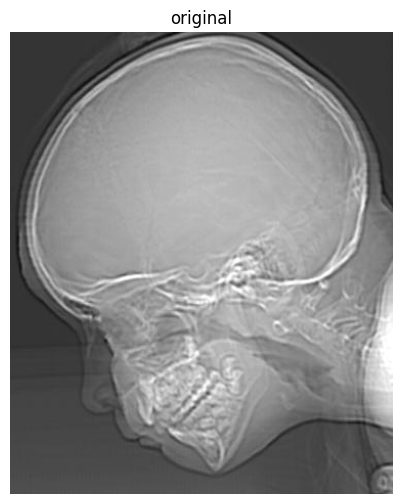

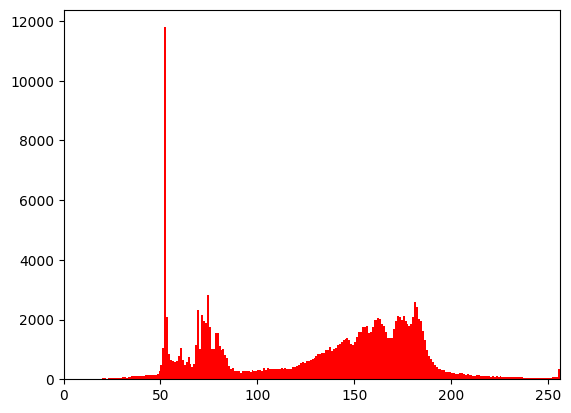

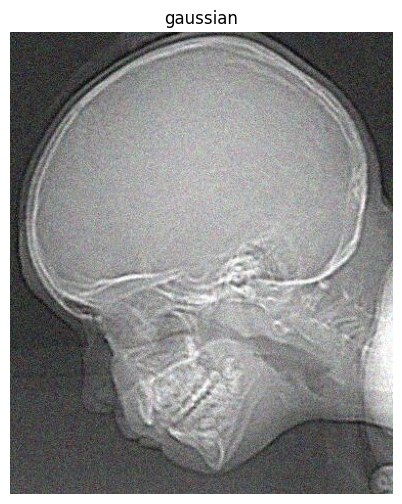

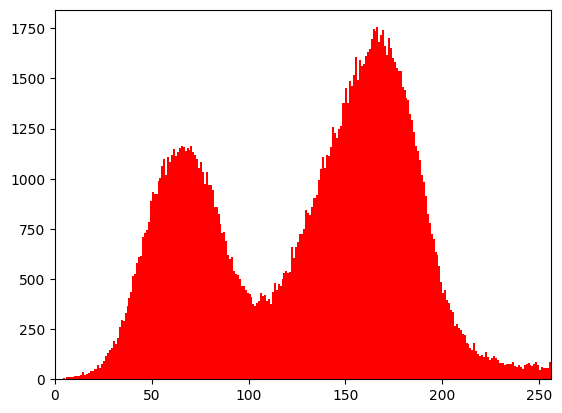

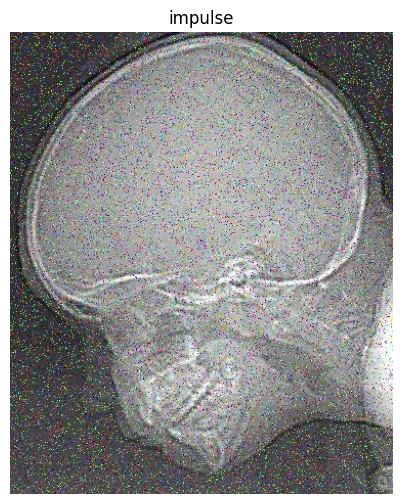

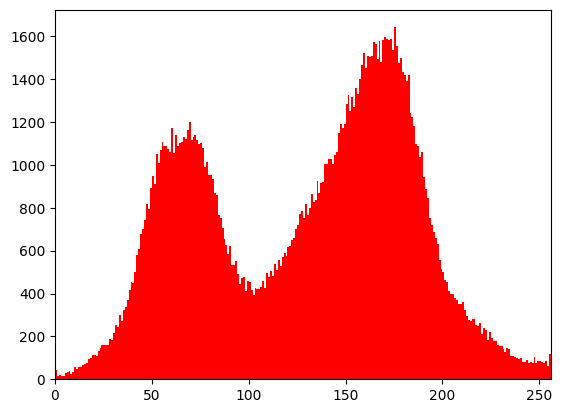

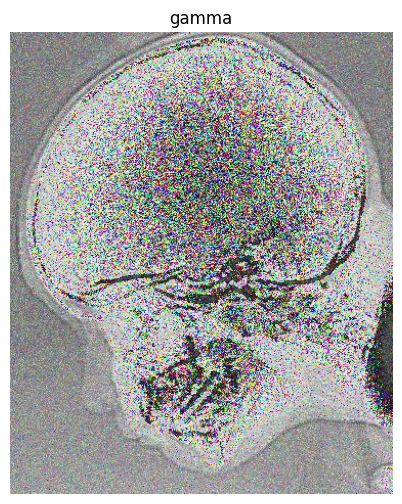

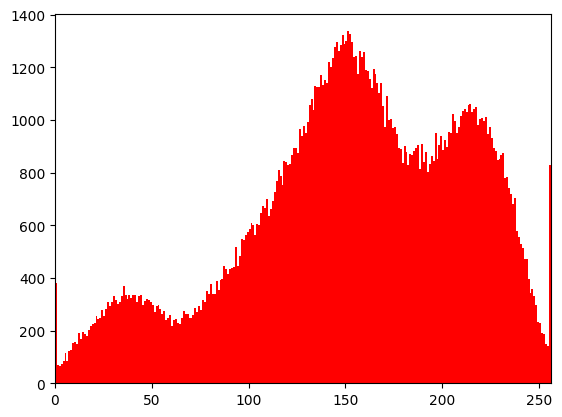

In [14]:
# Оригинальное изображение
open_image('scull.jpg', 'original')
Histogram_noise('scull.jpg')
# Накладываем гауссовский шум
additive_noise('gaussian', 0.9, 'gaussian_noise.jpg')
Histogram_noise('gaussian_noise.jpg')
# Накладываем импульсный шум 
additive_noise('impulse', 0.9, 'impulse_noise.jpg')
Histogram_noise('impulse_noise.jpg')
# Накладываем импугамма льсный шум
GammaNoise('scull.jpg', 1, 8, 'gamma_noise.jpg') # Используем свой модуль
Histogram_noise('gamma_noise.jpg')



In [9]:
def plot_open (name, noise_name):
    plt.figure(figsize=(8, 6))
    plt.axis('off')
    plt.imshow(name, cmap='gray') 
    plt.title(noise_name)


##### 2. Восстановите изображение черепа человека, искаженного гауссовым шумом, с помощью следующих видов фильтрации: усредняющий фильтр (на основе вычисления среднеарифметического), медианный фильтр, фильтр срединной точки. Сравните полученные результаты, сделайте выводы.

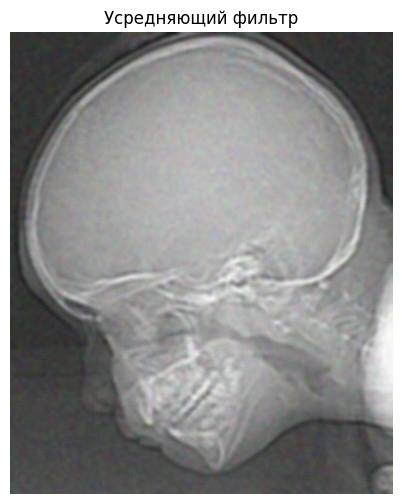

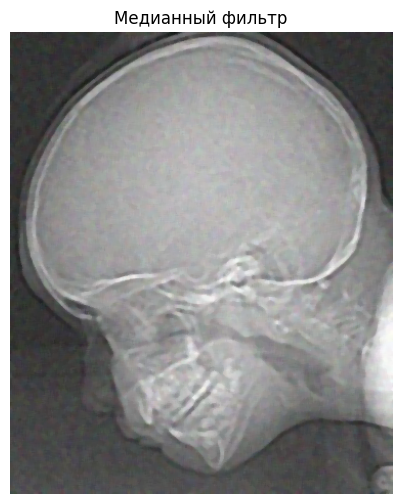

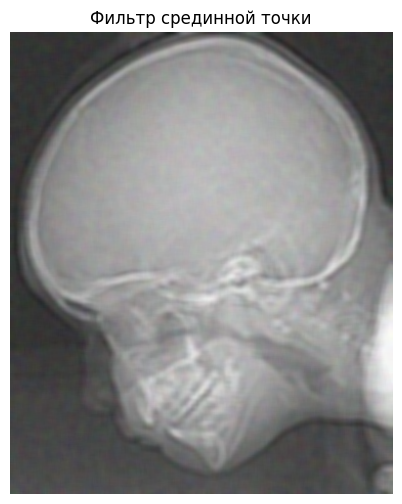

In [ ]:
# Загружаем изображение искаженного гауссовым шумом
img_gaussian = cv2.imread('gaussian_noise.jpg')

# Усредняющий фильтр
kernel = np.ones((5,5), np.float32) / 25 # 2D-матрица
w = cv2.filter2D(img_gaussian, -1, kernel)
plot_open(w,'Усредняющий фильтр')

# Медианный фильтр
median = cv2.medianBlur(img_gaussian, 5) 
plot_open(median,'Медианный фильтр')

# Фильтр срединной точки
sred = cv2.blur(img_gaussian, (7,7))
plot_open(sred,'Фильтр срединной точки')


##### 3. Восстановите изображение черепа человека, искаженного импульсным шумом, с помощью следующих видов фильтрации: фильтр максимума, фильтр минимума, медианный фильтр, фильтр срединной точки, усредняющий фильтр (на основе вычисления среднеарифметического).

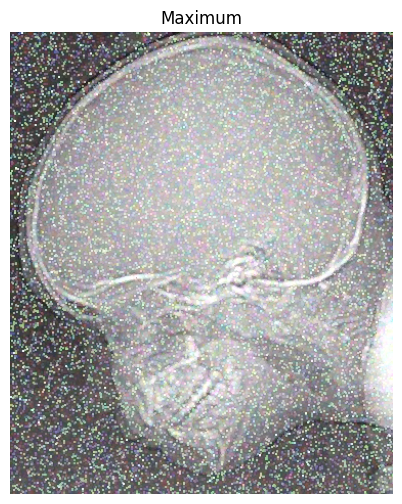

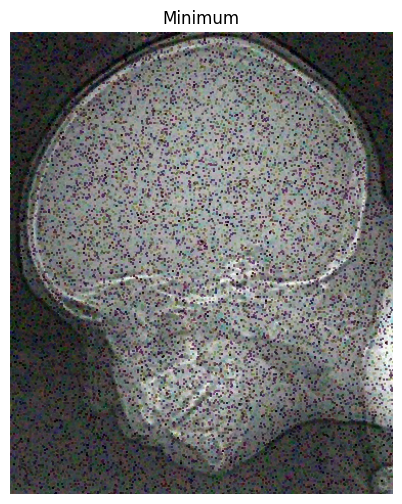

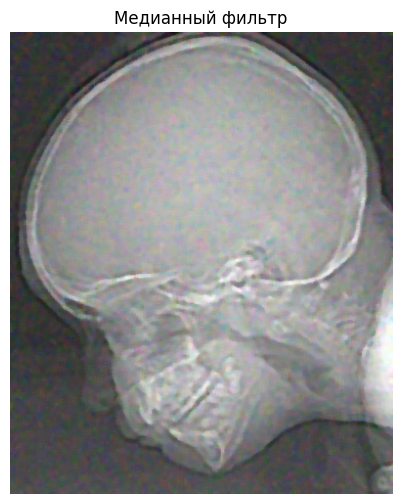

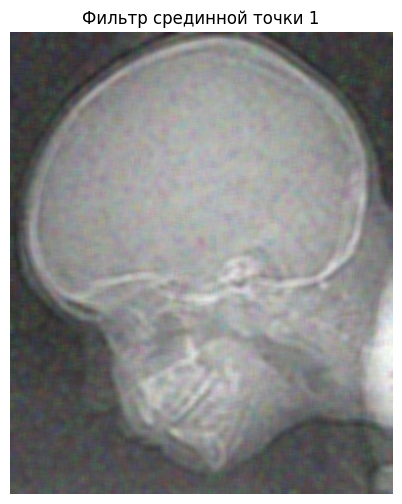

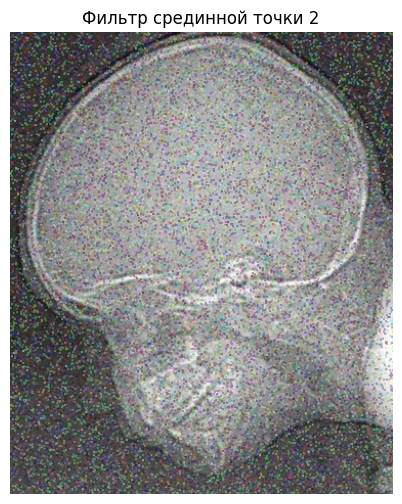

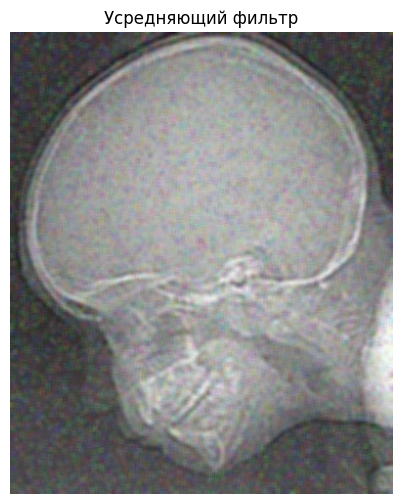

In [17]:
# Загружаем изображение искаженного импульсным шумом
img_impulse = cv2.imread('impulse_noise.jpg')
kernel = cv2.getStructuringElement (cv2.MORPH_RECT, (2, 2)) 

# фильтр Максимума
maximum = cv2.dilate(img_impulse, kernel)
plot_open(maximum,'Maximum')

# Фильтр минимума
minimum = cv2.erode(img_impulse, kernel)
plot_open(minimum, 'Minimum')

# Медианный фильтр
median = cv2.medianBlur(img_impulse, 5) 
plot_open(median,'Медианный фильтр')

# Фильтр срединной точки

# 1 способ (берем готовую функцию)
blur = cv2.blur(img_impulse, (7,7))
plot_open(blur,'Фильтр срединной точки 1')

# 2 способ (берём среднее арифметическое от двух отфильтрованных изображений (одно по максимуму, другое по миниимуму)
median_filter_result = (maximum.astype(np.float32) + minimum.astype(np.float32)) / 2
# Приведение результата к диапазону [0..255]
median_filter_result = np.clip(median_filter_result, 0, 255).astype(np.uint8)
plot_open(median_filter_result, 'Фильтр срединной точки 2')

# Усредняющий фильтр
kernel = np.ones((5,5), np.float32) / 25
w = cv2.filter2D(img_impulse, -1, kernel)
plot_open(w,'Усредняющий фильтр')



##### 4. Получите размытое изображение черепа человека, искаженного гауссовым шумом. С помощью методов винеровской фильтрации восстановите изображение полученное в 4-м пункте.

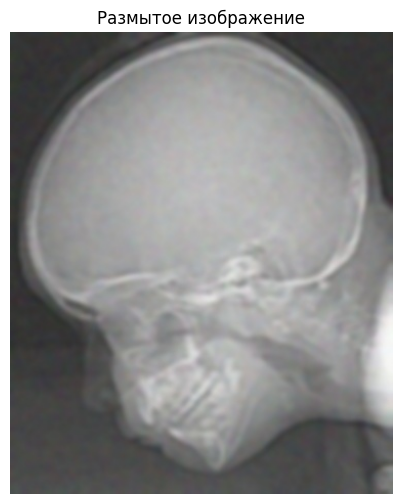

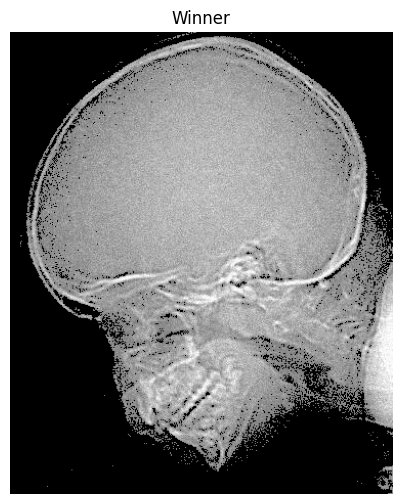

In [31]:
from scipy.signal import wiener
# Загрузка изображения черепа
image = cv2.imread('gaussian_noise.jpg')  # Укажите путь к вашему изображению
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Применение гауссового размытия
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)
cv2.imwrite('blurred.jpg', blurred_image)
open_image('blurred.jpg', 'Размытое изображение')

# Применение виннеровской фильтрации
f = cv2.imread('gaussian_noise.jpg')
f = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
winner = wiener(f, mysize = (1,1))
# Обработка возможных NaN значений
winner = np.nan_to_num(winner)
# Применение пороговой фильтрации
ret, win = cv2.threshold(winner, 120, 255, cv2.THRESH_TOZERO)
plot_open(win, 'Winner')

# Библиотека в Python не имеет так много методов как MATLAB.




In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt




